In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords


from src.data import read_files

In [99]:
# We can write code in this notebook for now.
# Later on we can move the code to `main.py` and use this for the executive summary.

In [100]:
# Load the first `nrows` lines of train, test
train, test = read_files(nrows=10000)

Reading CSV files...


In [101]:
train = train.drop_duplicates('text') 
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 14 columns):
business_id    9999 non-null int64
date           9999 non-null object
stars          9999 non-null float64
text           9999 non-null object
attributes     9629 non-null object
categories     9999 non-null object
city           9999 non-null object
hours          9201 non-null object
is_open        9999 non-null int64
latitude       9999 non-null float64
longitude      9999 non-null float64
name           9999 non-null object
postal_code    9981 non-null object
state          9999 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [103]:
yelp = train.copy()

In [158]:
yelp['text length'] = yelp['text'].apply(lambda x: len(x.split(" "))) #get the number of words in text
yelp.head()

,business_id,date,stars,text,attributes,categories,city,hours,is_open,latitude,longitude,name,postal_code,state,text length
0,31292,2013-05-07 04:34:36,1.0,Total bill for this horrible service? Over $8G...,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.215546,-115.248798,MountainView Hospital,89128,NV,39
1,35344,2017-01-14 21:30:33,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Beauty & Spas, Hair Stylists, Makeup Artists, ...",Las Vegas,"{'Monday': '10:0-17:0', 'Tuesday': '10:0-19:0'...",1,36.110083,-115.153871,Kelly Cardenas Salon - Hard Rock Hotel & Casino,89169,NV,288
2,152538,2016-11-09 20:09:03,5.0,I have to say that this office really has it t...,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Health & Medical, Cosmetic Dentists, Orthodont...",Chandler,"{'Monday': '0:0-0:0', 'Tuesday': '7:0-17:0', '...",1,33.259702,-111.790203,J. Philipp Centers for Family and Cosmetic Den...,85286,AZ,113
3,71871,2018-01-09 20:56:38,5.0,Went in for a lunch. Steak sandwich was delici...,"{'HasTV': 'True', 'RestaurantsReservations': '...","Bars, Pubs, Nightlife, Tapas Bars, Restaurants",Calgary,NaN,1,50.969721,-114.070115,Regal Beagle Pub,T2J 3G8,AB,65
4,64913,2018-01-30 23:07:38,1.0,Today was my second out of three sessions I ha...,"{'WheelchairAccessible': 'False', 'BusinessAcc...","Teeth Whitening, Beauty & Spas",Scottsdale,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,33.496713,-111.927958,White Teeth AZ,85251,AZ,673


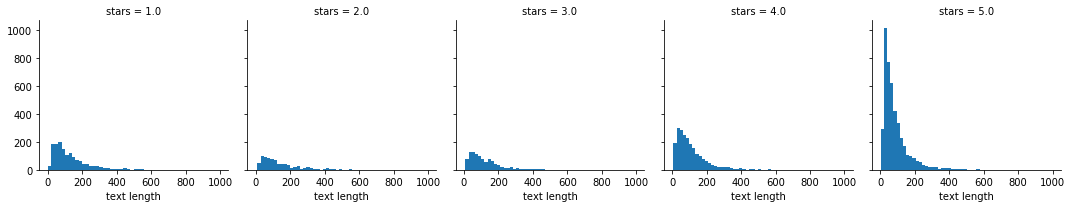

In [159]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

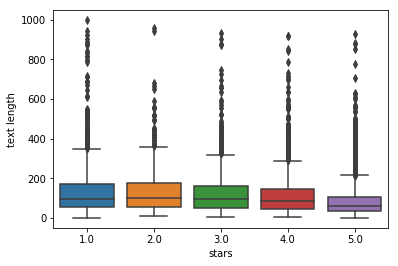

In [160]:
sns.boxplot(x='stars', y='text length', data=yelp)

In [52]:
#extract the 2 extreme situation
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.shape

(5942, 15)

In [53]:
X = yelp_class['text']
y = yelp_class['stars']
X[0]

'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.'

In [54]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [106]:
yelp_class['text_clean'] = yelp_class['text'].apply(lambda x: text_process(x))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if sys.path[0] == '':
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
yelp_class.head

<bound method DataFrame.head of       business_id                 date  stars  \
0           31292  2013-05-07 04:34:36    1.0   
1           35344  2017-01-14 21:30:33    5.0   
2          152538  2016-11-09 20:09:03    5.0   
3           71871  2018-01-09 20:56:38    5.0   
4           64913  2018-01-30 23:07:38    1.0   
7          139555  2010-10-05 19:12:35    1.0   
10          40775  2017-12-15 23:27:08    1.0   
13         185188  2012-07-16 00:37:14    1.0   
14          10013  2017-04-07 21:27:49    5.0   
16          33304  2017-05-26 01:23:19    5.0   
19          64416  2016-07-25 03:57:19    5.0   
20         176384  2013-12-07 02:32:45    5.0   
21          93217  2014-08-10 22:07:35    1.0   
22          18125  2013-12-28 22:28:08    5.0   
23         156644  2014-04-19 15:03:17    1.0   
24          81486  2017-02-09 03:43:25    1.0   
25         125478  2014-12-17 19:04:33    5.0   
26          85734  2014-06-27 21:32:31    1.0   
27         173372  2015-12-05 02:37:0

In [110]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chloe/nltk_data...


In [111]:
yelp_class["sentiments"] = yelp_class["text"].apply(lambda x: sid.polarity_scores(x))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
yelp_class.head

<bound method DataFrame.head of       business_id                 date  stars  \
0           31292  2013-05-07 04:34:36    1.0   
1           35344  2017-01-14 21:30:33    5.0   
2          152538  2016-11-09 20:09:03    5.0   
3           71871  2018-01-09 20:56:38    5.0   
4           64913  2018-01-30 23:07:38    1.0   
7          139555  2010-10-05 19:12:35    1.0   
10          40775  2017-12-15 23:27:08    1.0   
13         185188  2012-07-16 00:37:14    1.0   
14          10013  2017-04-07 21:27:49    5.0   
16          33304  2017-05-26 01:23:19    5.0   
19          64416  2016-07-25 03:57:19    5.0   
20         176384  2013-12-07 02:32:45    5.0   
21          93217  2014-08-10 22:07:35    1.0   
22          18125  2013-12-28 22:28:08    5.0   
23         156644  2014-04-19 15:03:17    1.0   
24          81486  2017-02-09 03:43:25    1.0   
25         125478  2014-12-17 19:04:33    5.0   
26          85734  2014-06-27 21:32:31    1.0   
27         173372  2015-12-05 02:37:0

In [114]:
yelp_class = pd.concat([yelp_class.drop(['sentiments'], axis=1), yelp_class['sentiments'].apply(pd.Series)], axis=1)

In [115]:
yelp_class.head

<bound method DataFrame.head of       business_id                 date  stars  \
0           31292  2013-05-07 04:34:36    1.0   
1           35344  2017-01-14 21:30:33    5.0   
2          152538  2016-11-09 20:09:03    5.0   
3           71871  2018-01-09 20:56:38    5.0   
4           64913  2018-01-30 23:07:38    1.0   
7          139555  2010-10-05 19:12:35    1.0   
10          40775  2017-12-15 23:27:08    1.0   
13         185188  2012-07-16 00:37:14    1.0   
14          10013  2017-04-07 21:27:49    5.0   
16          33304  2017-05-26 01:23:19    5.0   
19          64416  2016-07-25 03:57:19    5.0   
20         176384  2013-12-07 02:32:45    5.0   
21          93217  2014-08-10 22:07:35    1.0   
22          18125  2013-12-28 22:28:08    5.0   
23         156644  2014-04-19 15:03:17    1.0   
24          81486  2017-02-09 03:43:25    1.0   
25         125478  2014-12-17 19:04:33    5.0   
26          85734  2014-06-27 21:32:31    1.0   
27         173372  2015-12-05 02:37:0

In [116]:
# add number of characters column
yelp_class["nb_chars"] = yelp_class["text"].apply(lambda x: len(x))
# add number of words column
yelp_class["nb_words"] = yelp_class["text"].apply(lambda x: len(x.split(" ")))

In [118]:
yelp_class.info

<bound method DataFrame.info of       business_id                 date  stars  \
0           31292  2013-05-07 04:34:36    1.0   
1           35344  2017-01-14 21:30:33    5.0   
2          152538  2016-11-09 20:09:03    5.0   
3           71871  2018-01-09 20:56:38    5.0   
4           64913  2018-01-30 23:07:38    1.0   
7          139555  2010-10-05 19:12:35    1.0   
10          40775  2017-12-15 23:27:08    1.0   
13         185188  2012-07-16 00:37:14    1.0   
14          10013  2017-04-07 21:27:49    5.0   
16          33304  2017-05-26 01:23:19    5.0   
19          64416  2016-07-25 03:57:19    5.0   
20         176384  2013-12-07 02:32:45    5.0   
21          93217  2014-08-10 22:07:35    1.0   
22          18125  2013-12-28 22:28:08    5.0   
23         156644  2014-04-19 15:03:17    1.0   
24          81486  2017-02-09 03:43:25    1.0   
25         125478  2014-12-17 19:04:33    5.0   
26          85734  2014-06-27 21:32:31    1.0   
27         173372  2015-12-05 02:37:0

In [146]:
yelp_clean = yelp_class[['business_id','date','stars','text','text_clean','compound','neg','neu','pos','nb_words']]
yelp_clean.head

<bound method DataFrame.head of       business_id                 date  stars  \
0           31292  2013-05-07 04:34:36    1.0   
1           35344  2017-01-14 21:30:33    5.0   
2          152538  2016-11-09 20:09:03    5.0   
3           71871  2018-01-09 20:56:38    5.0   
4           64913  2018-01-30 23:07:38    1.0   
7          139555  2010-10-05 19:12:35    1.0   
10          40775  2017-12-15 23:27:08    1.0   
13         185188  2012-07-16 00:37:14    1.0   
14          10013  2017-04-07 21:27:49    5.0   
16          33304  2017-05-26 01:23:19    5.0   
19          64416  2016-07-25 03:57:19    5.0   
20         176384  2013-12-07 02:32:45    5.0   
21          93217  2014-08-10 22:07:35    1.0   
22          18125  2013-12-28 22:28:08    5.0   
23         156644  2014-04-19 15:03:17    1.0   
24          81486  2017-02-09 03:43:25    1.0   
25         125478  2014-12-17 19:04:33    5.0   
26          85734  2014-06-27 21:32:31    1.0   
27         173372  2015-12-05 02:37:0

In [128]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [132]:
# clean text data
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chloe/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/chloe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [147]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
yelp_clean["review_clean"] = yelp_clean["text"].apply(lambda x: clean_text(x))

In [135]:
yelp_clean.head

<bound method DataFrame.head of       business_id                 date  \
0           31292  2013-05-07 04:34:36   
1           35344  2017-01-14 21:30:33   
2          152538  2016-11-09 20:09:03   
3           71871  2018-01-09 20:56:38   
4           64913  2018-01-30 23:07:38   
7          139555  2010-10-05 19:12:35   
10          40775  2017-12-15 23:27:08   
13         185188  2012-07-16 00:37:14   
14          10013  2017-04-07 21:27:49   
16          33304  2017-05-26 01:23:19   
19          64416  2016-07-25 03:57:19   
20         176384  2013-12-07 02:32:45   
21          93217  2014-08-10 22:07:35   
22          18125  2013-12-28 22:28:08   
23         156644  2014-04-19 15:03:17   
24          81486  2017-02-09 03:43:25   
25         125478  2014-12-17 19:04:33   
26          85734  2014-06-27 21:32:31   
27         173372  2015-12-05 02:37:03   
28          29601  2016-03-07 01:03:08   
30         161100  2015-06-21 00:59:14   
31         166260  2018-02-01 19:01:16   
32

In [148]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(yelp_clean["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = yelp_clean.index
reviews_df = pd.concat([yelp_clean, tfidf_df], axis=1)

In [149]:
reviews_df.head

<bound method DataFrame.head of       business_id                 date  stars  \
0           31292  2013-05-07 04:34:36    1.0   
1           35344  2017-01-14 21:30:33    5.0   
2          152538  2016-11-09 20:09:03    5.0   
3           71871  2018-01-09 20:56:38    5.0   
4           64913  2018-01-30 23:07:38    1.0   
7          139555  2010-10-05 19:12:35    1.0   
10          40775  2017-12-15 23:27:08    1.0   
13         185188  2012-07-16 00:37:14    1.0   
14          10013  2017-04-07 21:27:49    5.0   
16          33304  2017-05-26 01:23:19    5.0   
19          64416  2016-07-25 03:57:19    5.0   
20         176384  2013-12-07 02:32:45    5.0   
21          93217  2014-08-10 22:07:35    1.0   
22          18125  2013-12-28 22:28:08    5.0   
23         156644  2014-04-19 15:03:17    1.0   
24          81486  2017-02-09 03:43:25    1.0   
25         125478  2014-12-17 19:04:33    5.0   
26          85734  2014-06-27 21:32:31    1.0   
27         173372  2015-12-05 02:37:0

In [150]:
# show is_bad_review distribution
reviews_df["stars"].value_counts(normalize = True)

5.0    0.748906
1.0    0.251094
Name: stars, dtype: float64

In [161]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()


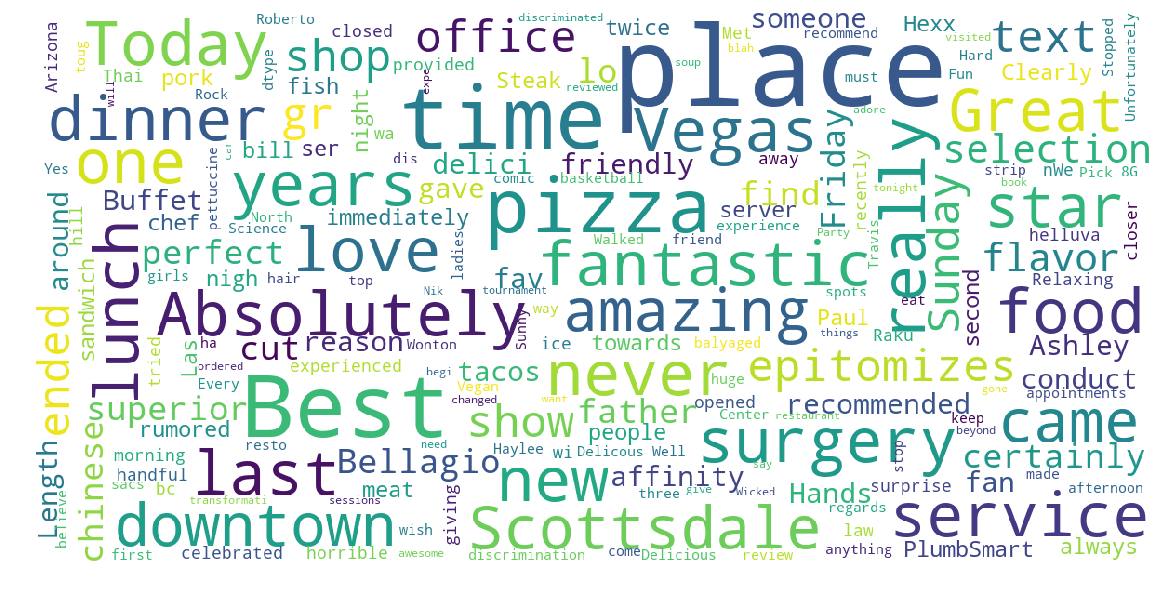

In [162]:
# print wordcloud
show_wordcloud(reviews_df["text"])

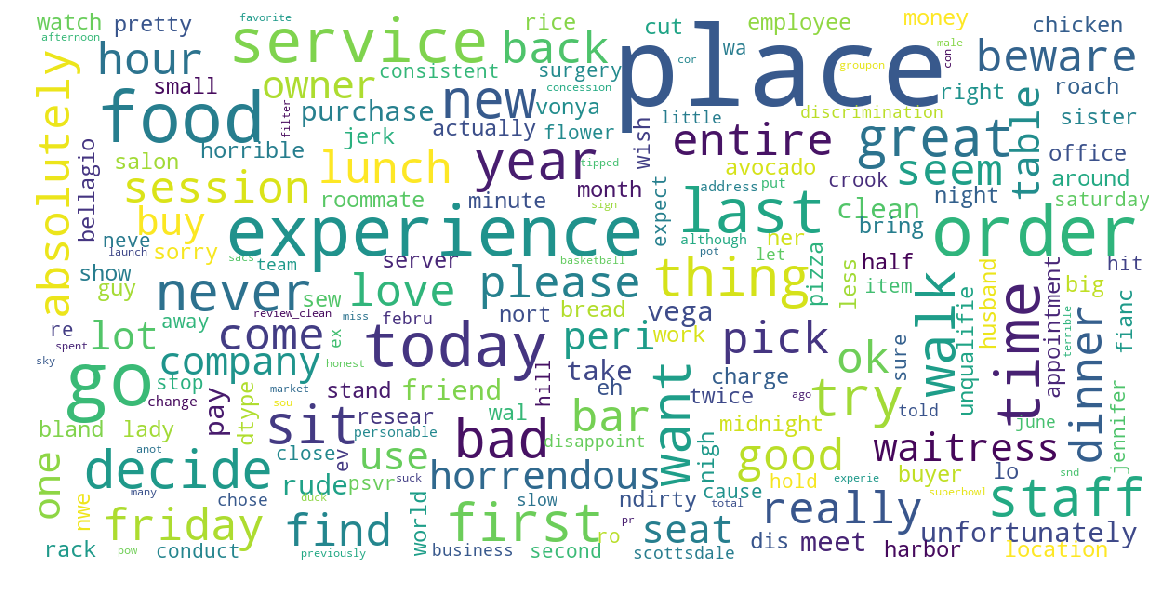

In [164]:
# print wordcloud
show_wordcloud(reviews_df[reviews_df['stars'] == 1]["review_clean"])

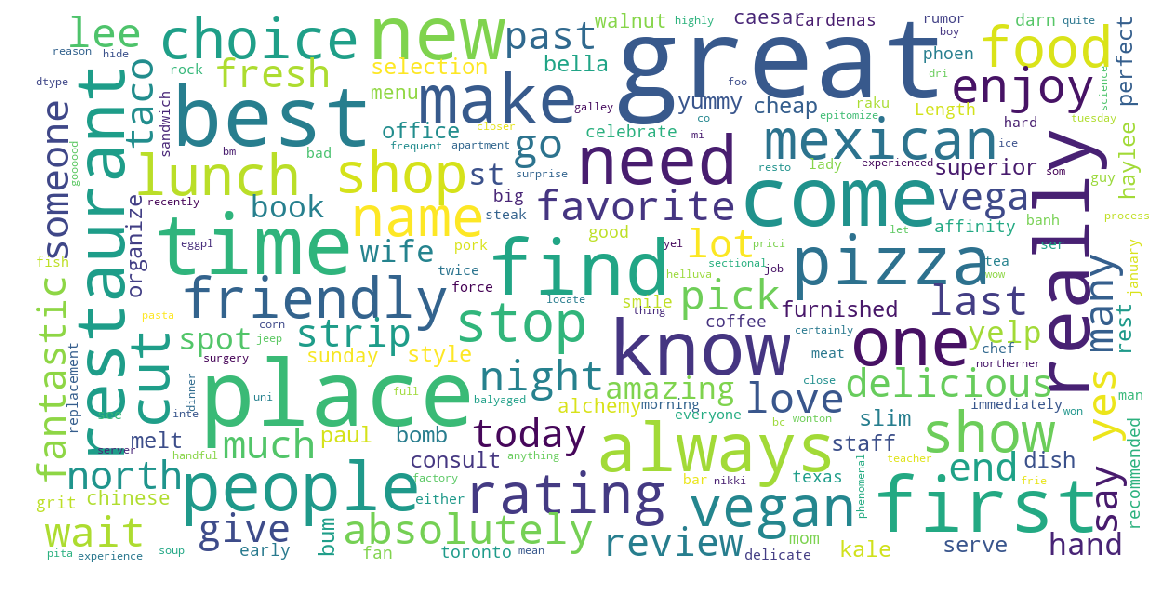

In [165]:
# print wordcloud
show_wordcloud(reviews_df[reviews_df['stars'] == 5]["review_clean"])

In [153]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["text", "pos"]].head(10)

,text,pos
145,Thank you so much Tanner! Fantastic job. Sup...,0.743
9655,Yummy treats! Great spot. Very friendly folks,0.738
197,"My favorite burger joint! Simple, yet deliciou...",0.710
4850,Best Schnitzel in town.\nGreat German bread.\n...,0.681
3336,Excellent Thai food. Friendly service staff. C...,0.660
5257,Excellent. Clean place. The food is delicious....,0.660
4224,Amazing place to eat chill environment and sup...,0.656
2718,Great place. Pork Belly was excellent! Great...,0.650
3204,"Cost friendly, super fun and great for dates o...",0.637
2397,Great service great tacos ...Monica the manage...,0.633


In [167]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["text", "neg"]].head(10)

,text,neg
4839,BIZARRE. Unprofessional. Revolving door for ...,0.559
9184,Weak. If youre thinking about eating here chan...,0.511
1209,Horrible! No shuttles running. No one at the g...,0.474
6428,"Horrible food, worse music, inattentive staff ...",0.468
7885,This specific location is absolutely terrible....,0.414
1892,"The service is horrible, atmosphere is horribl...",0.412
9601,I love smash burger in general but this locati...,0.394
1156,Worst food experience ever. Avoid this place ...,0.391
3345,Floors are dirty. No choice of soda as they ar...,0.389
9413,"ZERO STARS ACTUALLY! Horrible! Over priced, n...",0.385


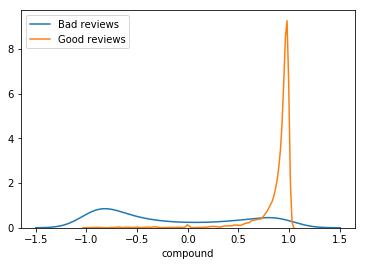

In [156]:
# plot sentiment distribution for positive and negative reviews
import seaborn as sns

for x in [1, 5]:
    subset = reviews_df[reviews_df['stars'] == x]
    
    # Draw the density plot
    if x == 5:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)